In [3]:
#pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv("sales_data_sample.csv", sep=",", encoding='Latin-1')

In [5]:
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
# drop unwanted  features
sales = dataset.drop(columns=["ORDERDATE","CITY","STATUS","POSTALCODE","STATE", "TERRITORY", "CONTACTLASTNAME", "CONTACTFIRSTNAME","CUSTOMERNAME", "PHONE", "ORDERNUMBER", "ADDRESSLINE1", "ADDRESSLINE2"])

In [7]:
#pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
sales['PRODUCTLINE'] = labelencoder.fit_transform(sales['PRODUCTLINE'])
sales['COUNTRY'] = labelencoder.fit_transform(sales['COUNTRY'])
sales['DEALSIZE'] = labelencoder.fit_transform(sales['DEALSIZE'])
sales['PRODUCTCODE'] = labelencoder.fit_transform(sales['PRODUCTCODE'])

sales.head(4)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,1,95,0,18,2
1,34,81.35,5,2765.90,2,5,2003,1,95,0,6,2
2,41,94.74,2,3884.34,3,7,2003,1,95,0,6,1
3,45,83.26,6,3746.70,3,8,2003,1,95,0,18,1


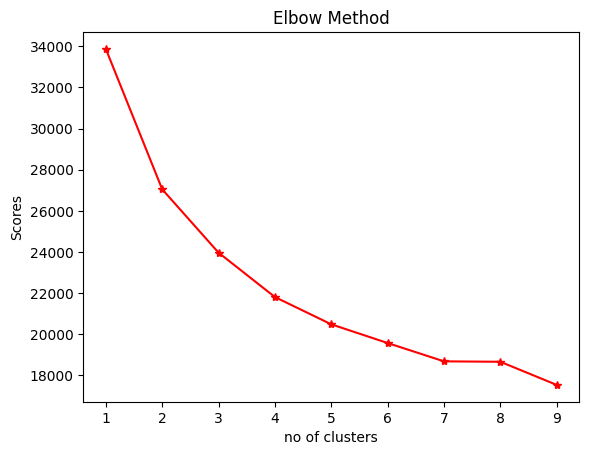

In [8]:
#Finding optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales)

scores_1 = []

range_of_cluster = range(1,10)

for i in range_of_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'r*-')
plt.xticks(np.arange(len(scores_1)), np.arange(1, len(scores_1) +1) )
plt.title('Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Scores')
plt.show()

In [9]:
# selected number of clusters as 5. (n = 5) based on the above graph

kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(scaled_data)

clusters_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[sales.columns])
y_kmeans = kmeans.predict(scaled_data)

data_with_cluster = pd.concat([sales, pd.DataFrame({'CLUSTER': kmeans.labels_})], axis=1)
data_with_cluster.head(10)
print(clusters_centers)

  QUANTITYORDERED PRICEEACH ORDERLINENUMBER     SALES    QTR_ID  MONTH_ID  \
0       -0.390667 -0.759915        0.034644 -0.800522 -1.062224 -1.062863   
1       -0.044477  0.760564        0.028272  0.904309  0.599893  0.587105   
2        0.534521  0.476711        0.042505  0.382704  0.666813  0.670633   
3        0.509306  0.623527       -0.180381  0.715574 -1.138398 -1.132458   
4       -0.462596 -0.755469        0.059473 -0.817940  0.761568  0.763082   

    YEAR_ID PRODUCTLINE      MSRP PRODUCTCODE   COUNTRY  DEALSIZE  
0  0.485874    0.166686 -0.630307    0.351239 -0.154912  0.940604  
1 -0.448910   -0.751082  1.345112   -1.056541 -0.000311 -0.872572  
2 -0.371298    0.370222 -0.096052    0.357315  0.117264 -0.700747  
3  0.779368   -0.088579  0.437670   -0.256917 -0.015196 -0.827869  
4 -0.379144    0.155740 -0.665711    0.353837  0.039915  1.015353  


In [10]:
pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.


In [11]:

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

In [12]:
#Dimension Reduce
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_comp, columns=['pca_1', 'pca_2', 'pca_3'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

#Showing
import plotly
import plotly.express as px
fig = px.scatter_3d(pca_df, x='pca_1', y='pca_2', z= 'pca_3',color='cluster', symbol='cluster', size_max=20, opacity=0.6)
fig.show()

fig = px.scatter(pca_df, x='pca_1', y='pca_2',color ='cluster',symbol='cluster')
fig.show()